<a href="https://colab.research.google.com/github/JANANI-B-S/covid19/blob/main/covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


file_path = '/content/sample_data/covid_tracking.csv'
covid_data = pd.read_csv(file_path)

# Print first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(covid_data.head())

# Print specific columns 'date', 'positive', 'negative'
print("\nPrinting specific columns:")
print(covid_data[['date', 'positive', 'negative']])

# Print rows where 'positive' cases are greater than 100
print("\nPrinting rows where positive cases > 100:")
print(covid_data[covid_data['positive'] > 100])

First 5 rows of the DataFrame:
         date state  positive   negative  pending  hospitalized_currently  \
0  2021-03-07    AK   56886.0        NaN      NaN                    33.0   
1  2021-03-07    AL  499819.0  1931711.0      NaN                   494.0   
2  2021-03-07    AR  324818.0  2480716.0      NaN                   335.0   
3  2021-03-07    AS       0.0     2140.0      NaN                     NaN   
4  2021-03-07    AZ  826454.0  3073010.0      NaN                   963.0   

   hospitalized_cumulative  in_icu_currently  in_icu_cumulative  \
0                   1293.0               NaN                NaN   
1                  45976.0               NaN             2676.0   
2                  14926.0             141.0                NaN   
3                      NaN               NaN                NaN   
4                  57907.0             273.0                NaN   

   on_ventilator_currently  ...  fips  death_increase  hospitalized_increase  \
0                      

In [2]:
top_5_states = covid_data.nlargest(5, 'positive')

print("Details of states with the five highest positive test cases:")
print(top_5_states[['state', 'positive', 'negative', 'recovered', 'death']])

Details of states with the five highest positive test cases:
    state   positive  negative  recovered  death
5      CA  3501394.0       NaN        NaN    NaN
65     CA  3497578.0       NaN        NaN    NaN
125    CA  3493126.0       NaN        NaN    NaN
185    CA  3488467.0       NaN        NaN    NaN
245    CA  3484963.0       NaN        NaN    NaN


In [3]:
covid_data['recovery_rate'] = (covid_data['recovered'] / covid_data['positive']) * 100

sorted_data = covid_data.sort_values(by='recovery_rate', ascending=False)

top_recovering_states = sorted_data[['state', 'positive', 'recovered', 'recovery_rate']].head(10)
print("States with highest recovery rates:")
print(top_recovering_states)

States with highest recovery rates:
    state  positive  recovered  recovery_rate
75     IA  282127.0   319780.0     113.346117
15     IA  282384.0   320054.0     113.339991
135    IA  281765.0   318996.0     113.213494
195    IA  281391.0   318560.0     113.209022
255    IA  280991.0   317731.0     113.075152
315    IA  280509.0   316185.0     112.718309
375    IA  280279.0   315443.0     112.546070
435    IA  280039.0   315134.0     112.532183
495    IA  279744.0   314750.0     112.513584
555    IA  279429.0   313771.0     112.290063


In [4]:
# Convert 'date' column to datetime if not already
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Extract month and year from 'date'
covid_data['month'] = covid_data['date'].dt.month
covid_data['year'] = covid_data['date'].dt.year

# Group by state, month, and year to aggregate data
monthly_data = covid_data.groupby(['state', 'month', 'year']).agg({
    'positive': 'sum',
    'negative': 'sum',
    'recovered': 'sum',
    'death': 'sum'
}).reset_index()

# Filter for a specific state and year
state = 'California'
year = 2023
state_year_data = monthly_data[(monthly_data['state'] == state) & (monthly_data['year'] == year)]

# Print aggregated data for California in 2023
print(f"Aggregated data for {state} in {year}:")
print(state_year_data)

Aggregated data for California in 2023:
Empty DataFrame
Columns: [state, month, year, positive, negative, recovered, death]
Index: []


In [5]:
covid_data['case_fatality_rate'] = (covid_data['death'] / covid_data['positive']) * 100

# Sort by case fatality rate in descending order
sorted_data = covid_data.sort_values(by='case_fatality_rate', ascending=False)

# Print states with highest case fatality rates
top_fatality_states = sorted_data[['state', 'positive', 'death', 'case_fatality_rate']].head(10)
print("States with highest case fatality rates:")
print(top_fatality_states)

States with highest case fatality rates:
      state  positive  death  case_fatality_rate
20489    MP       2.0    1.0           50.000000
22067    WA      26.0    8.0           30.769231
22076    WA      18.0    5.0           27.777778
22083    WA      15.0    4.0           26.666667
22055    WA      43.0   11.0           25.581395
20069    MP       8.0    2.0           25.000000
22040    WA      59.0   14.0           23.728814
20009    MP      11.0    2.0           18.181818
19949    MP      11.0    2.0           18.181818
19889    MP      11.0    2.0           18.181818


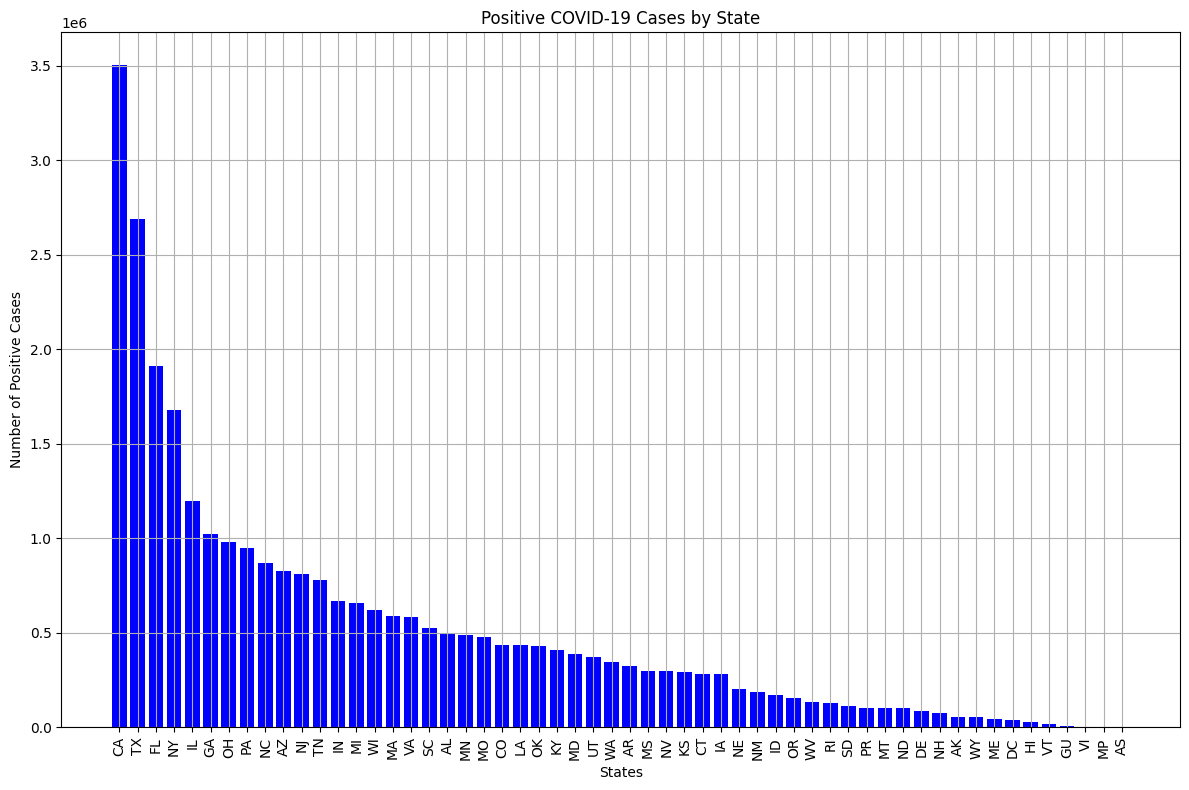

In [8]:

import matplotlib.pyplot as plt

sorted_data = covid_data.sort_values(by='positive', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(sorted_data['state'], sorted_data['positive'], color='blue')
plt.xlabel('States')
plt.ylabel('Number of Positive Cases')
plt.title('Positive COVID-19 Cases by State')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

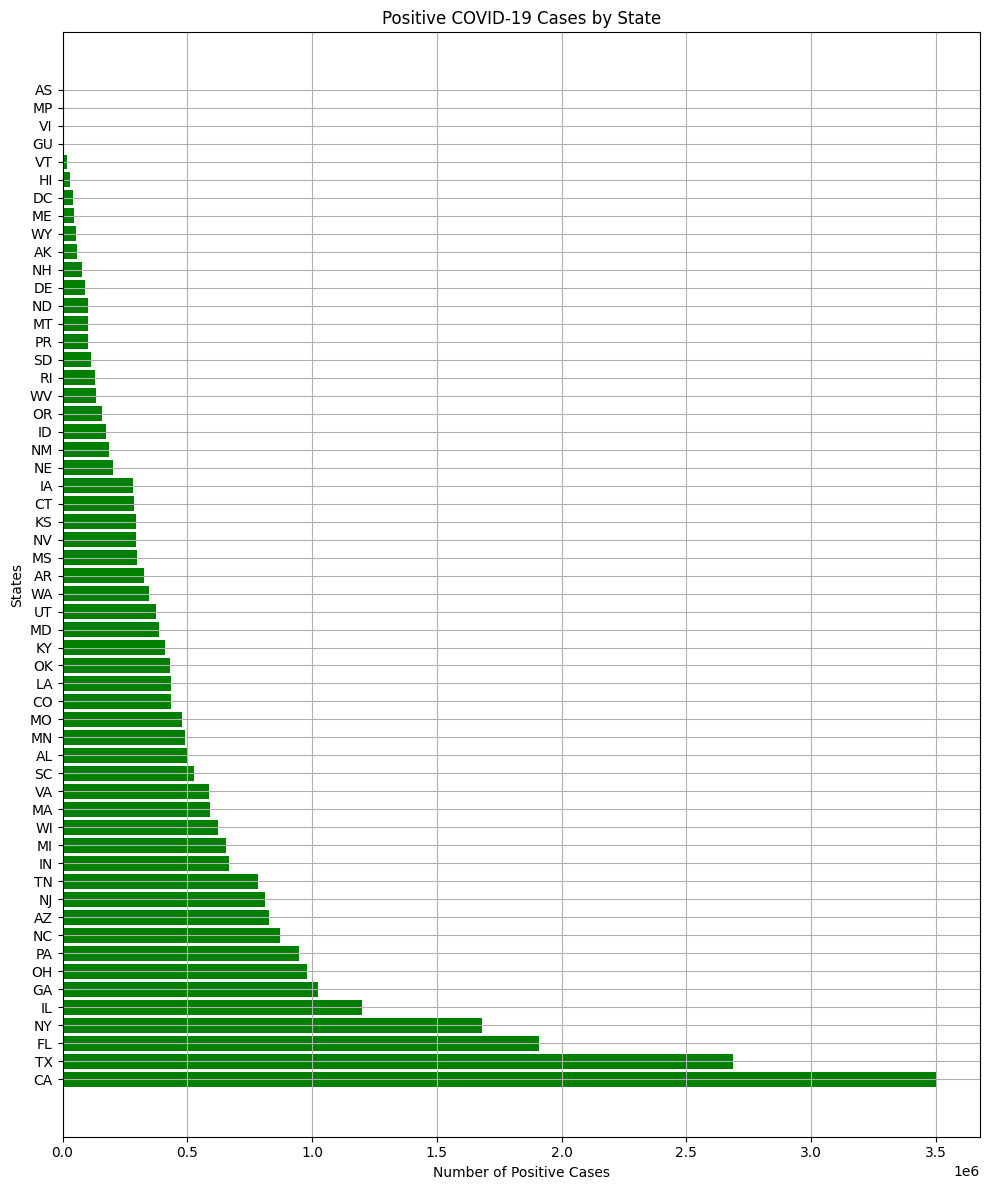

In [9]:
plt.figure(figsize=(10, 12))
plt.barh(sorted_data['state'], sorted_data['positive'], color='green')
plt.xlabel('Number of Positive Cases')
plt.ylabel('States')
plt.title('Positive COVID-19 Cases by State')
plt.grid(True)
plt.tight_layout()
plt.show()

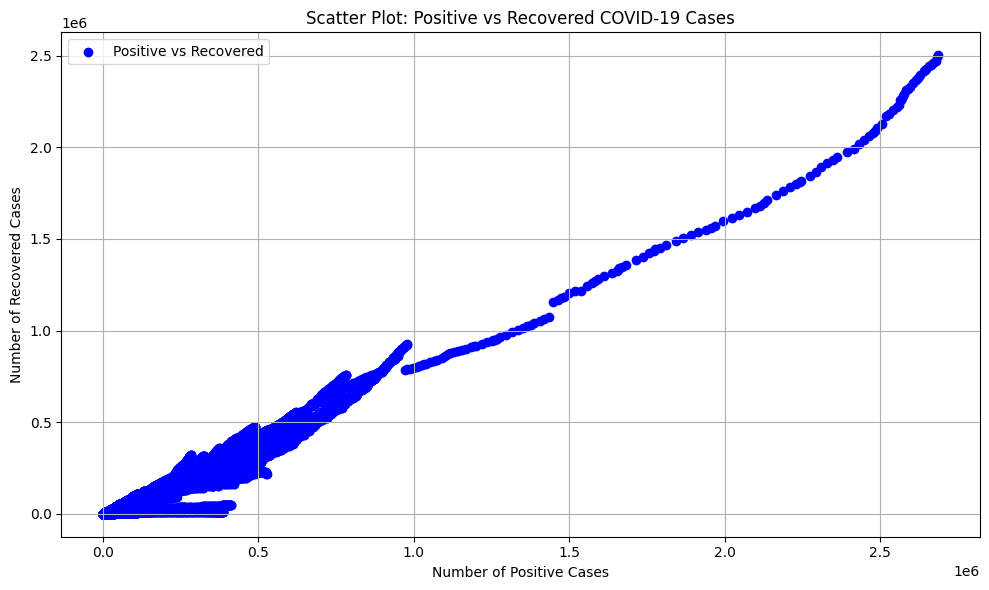

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(covid_data['positive'], covid_data['recovered'], color='blue', label='Positive vs Recovered')
plt.xlabel('Number of Positive Cases')
plt.ylabel('Number of Recovered Cases')
plt.title('Scatter Plot: Positive vs Recovered COVID-19 Cases')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

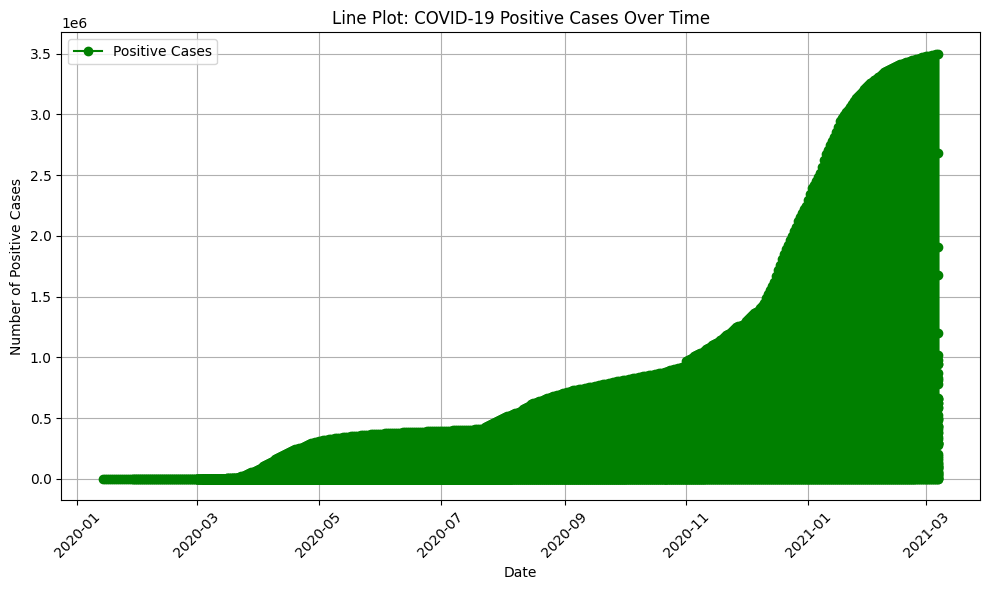

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(covid_data['date'], covid_data['positive'], marker='o', linestyle='-', color='green', label='Positive Cases')
plt.xlabel('Date')
plt.ylabel('Number of Positive Cases')
plt.title('Line Plot: COVID-19 Positive Cases Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
top_5_states = covid_data.nlargest(5, 'positive')


print("Details of states with the five highest positive test cases:")
print(top_5_states[['state', 'positive', 'negative', 'recovered', 'death']])

Details of states with the five highest positive test cases:
    state   positive  negative  recovered  death
5      CA  3501394.0       NaN        NaN    NaN
65     CA  3497578.0       NaN        NaN    NaN
125    CA  3493126.0       NaN        NaN    NaN
185    CA  3488467.0       NaN        NaN    NaN
245    CA  3484963.0       NaN        NaN    NaN
